PNS-2019 (National Health Survey 2019) – prediction of heart disease by LGBM modeling - EDA (Exploratory Data Analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn.tree import export_graphviz 
from IPython.display import Image



In [ ]:
df_pns_model= pd.read_csv('/content/drive/MyDrive/tcc_files/MBA_TCC_project/Project/GitHub/df_pns_rawdata.csv', sep=',', encoding = "ISO-8859-1")
df_pns_model.drop(df_pns_model.filter(regex="Unname"),axis=1, inplace=True)
df_pns_model

,index,Workforce,State,Live,Education,Income,Gender,Age,SkinColor,OralHealth,...,OCD,COPD,Cancer,KidneyFailure,SaltConsump,Alcohol,onTV,onPhoneComput,Smoke,Smoked
0,0,Able,RO,Capital,<9y,1/4-1/2mw,Female,55.0,whrite,<1y,...,0.0,0.0,0.0,0.0,Fair,<1month,2_3h_day,<1h_day,NoSmook,YesDaily
1,9,Able,RO,Capital,<12y,1/4-1/2mw,Female,19.0,brown,<1y,...,0.0,0.0,0.0,0.0,Fair,<1month,DontSeeTV,>6h_day,YesDaily,YesDaily
2,10,Able,RO,Capital,12y,1/2-1mw,Female,45.0,black,>3y,...,0.0,0.0,0.0,0.0,Low,>=1month,1_2h_day,1_2h_day,NoSmook,YesDaily
3,18,Able,RO,Capital,<1y,1/4-1/2mw,Female,58.0,black,<1y,...,0.0,0.0,0.0,0.0,Fair,NoDrink,<1h_day,3_6h_day,NoSmook,NoSmook
4,19,Unable,RO,Capital,<16,<1/4mw,Female,28.0,brown,<1y,...,0.0,0.0,0.0,0.0,Fair,NoDrink,1_2h_day,<1h_day,NoSmook,NoSmook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81213,285161,Able,GO,Other,<9y,1/2-1mw,Male,22.0,whrite,>3y,...,0.0,0.0,0.0,0.0,Fair,>=1month,1_2h_day,<1h_day,NoSmook,YesNotDaily
81214,285166,Able,GO,Other,<9y,1/4-1/2mw,Female,39.0,brown,1-2y,...,0.0,0.0,0.0,0.0,Much,NoDrink,1_2h_day,<1h_day,NoSmook,NoSmook
81215,285169,Unable,GO,Other,<9y,1/2-1mw,Female,71.0,brown,>3y,...,0.0,0.0,1.0,0.0,Low,NoDrink,3_6h_day,DontUseComp,NoSmook,NoSmook
81216,285172,Unable,GO,Other,<9y,1/4-1/2mw,Female,46.0,brown,>3y,...,0.0,0.0,0.0,0.0,Low,NoDrink,<1h_day,2_3h_day,NoSmook,NoSmook


In [ ]:
#Frequeny of Heart Disease
df=df_pns_model['HeartDisease'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='HeartDisease', width=800, height=400, color_discrete_sequence=["navy"], template="simple_white",
             title='Frequency of Heart Disease', labels={'index':'0=NoDiagnosis; 1=Diagnosis', 'HeartDisease':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)
fig.show()

In [ ]:
#Frequency of some variables to people declared to have heart disease diagnosis:
#Income, Age, Gender and Education

df1=(
     df_pns_model
      .filter(['HeartDisease', 'Income', 'Age', 'Gender', 'Education'])
      .query('HeartDisease == 1.0'))

# Age on Range
def classe_age (C008):
    if C008 >= 0 and C008 <= 20:
        return "0-20years"
    elif C008 >= 21  and C008 <= 40:
        return "21-40years"    
    elif C008 >= 41  and C008 <= 50:
        return "41-50years"
    elif C008 >= 51  and C008 <= 65:
        return "51-65years"
    elif C008 >= 66  and C008 <= 75:
        return "66-75years"
    elif C008 >= 76  and C008 <= 90:
        return "76-90years"
    elif C008 >= 90:
        return ">90years"

df1["OldRange"] = df1['Age'].apply(classe_age)
df1


,HeartDisease,Income,Age,Gender,Education,OldRange
43,1.0,2-3mw,38.0,Female,12y,21-40years
53,1.0,3-5mw,46.0,Male,>18y,41-50years
59,1.0,<1/4mw,27.0,Female,12y,21-40years
94,1.0,1/2-1mw,75.0,Female,<9y,66-75years
106,1.0,2-3mw,59.0,Male,>18y,51-65years
...,...,...,...,...,...,...
81162,1.0,1/2-1mw,58.0,Male,<9y,51-65years
81165,1.0,2-3mw,46.0,Male,<9y,41-50years
81186,1.0,3-5mw,36.0,Female,>18y,21-40years
81194,1.0,3-5mw,43.0,Female,>18y,41-50years


In [ ]:
df2=df1['OldRange'].value_counts(normalize=True)
df2 = df2.mul(100).round(2)
fig = px.bar(df2, x='OldRange', width=800, height=400, color_discrete_sequence=["olive"], template="simple_white", 
             labels={'index':'Age', 'OldRange':'% frequency'},
             title='Frequency of Heart Disease by Age',text_auto=True,
             category_orders={"index": ["0-20years","21-40years","41-50years","51-65years",'66-75years','76-90years', '>90years']})
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()


In [ ]:
df2=df1['Education'].value_counts(normalize=True)
df2 = df2.mul(100).round(2)
fig = px.bar(df2, x='Education', width=800, height=400, color_discrete_sequence=["olive"], template="simple_white", 
             labels={'index':'Education (year in school)', 'Education':'% frequency'},
             title='Frequency of Heart Disease and Education',
             category_orders={"index": ["<1y", "<9y","9y", "<12y", "12y", "<16", ">18y"]},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
df2=df1['Gender'].value_counts(normalize=True)
df2 = df2.mul(100).round(2)
fig = px.bar(df2, x='Gender', width=800, height=400, color_discrete_sequence=["olive"], template="simple_white", 
             labels={'index':'Gender', 'Gender':'% frequency'},title='Frequency of Heart Disease and Gender',text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
df2=df1['Income'].value_counts(normalize=True)
df2 = df2.mul(100).round(2)
fig = px.bar(df2, x='Income', width=800, height=400, color_discrete_sequence=["olive"], template="simple_white", 
             labels={'index':'Income (minimum wage, range)', 'Income':'% frequency'},
             title='Frequency of Heart Disease and Income, minimum official wage',
             category_orders={"index": ["<1/4mw", "1/4-1/2mw","1/2-1mw", "1-2mw", "2-3mw", "3-5mw", ">5mw"]},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
#Frequency of risk factor for heart disease in the population

df=df_pns_model['BloodPresure'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='BloodPresure', width=800, height=400, color_discrete_sequence=["green"], template="simple_white",
             title='Risk Factor for Heart Disease: High Blood Pressure', labels={'index':'0=NoDiagnosis; 1=Diagnosis', 'BloodPresure':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)
fig.show()

In [ ]:
# Abnormally elevated cholesterol or fats (lipids) in the blood.
df=df_pns_model['Dyslipidemia'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='Dyslipidemia', width=800, height=400, color_discrete_sequence=["green"], template="simple_white",
             title='Risk Factor for Heart Disease: Dyslipidemia', labels={'index': '0=NoDiagnosis; 1=Diagnosis', 'Dyslipidemia':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)
fig.show()

In [ ]:
#A group of diseases that result in too much sugar in the blood (high blood glucose).
df=df_pns_model['Diabetes'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='Diabetes', width=800, height=400, color_discrete_sequence=["green"], template="simple_white",
            title='Risk Factor for Heart Disease: Diabetes', labels={'index': '0=NoDiagnosis; 1=Diagnosis', 'Diabetes':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)
fig.show()

In [ ]:
# Sedentary behaviours, include sitting during commuting, in the workplace and the domestic environment, and during leisure time.
df=df_pns_model['onTV'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='onTV', width=800, height=400, color_discrete_sequence=["orange"], template="simple_white",
             category_orders={"index": ["DontSeeTV", "<1h_day","1_2h_day", "2_3h_day", "3_6h_day", ">6h_day"]},
             title='Risk Factor for Heart Disease: Physical Inactivity - TV Viewing', labels={'index': 'TV Viewing (hours/day)', 'onTV':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
df=df_pns_model['Alcohol'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='Alcohol', width=800, height=400, color_discrete_sequence=["brown"], template="simple_white",
             category_orders={"index": ["<1month", ">=1month","NoDrink"]},
             title='Risk Factor for Heart Disease: Alcohol Consumption', labels={'index': 'Alcohol Consumption (times/month)', 'alcohol':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
df=df_pns_model['SaltConsump'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='SaltConsump', width=800, height=400, color_discrete_sequence=["brown"], template="simple_white",
             category_orders={"index": ["TooMuch", "Much","Fair", "Low", 'VeryLow']},
             title='Risk Factor for Heart Disease: Perception of the Salt consumption', labels={'index': 'Salt Consumption', 'SaltConsump':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.show()

In [ ]:
df=df_pns_model['PhysSport'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='PhysSport', width=800, height=400, color_discrete_sequence=["orange"], template="simple_white", 
             title='Risk Factor for Heart Disease: Physic Ativity and Sport, last three months', labels={'index': '0=No Physical Act 1= Yes Physical Act', 'PhysSport':'% frequency'},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)

fig.show()

In [ ]:
df=df_pns_model['Stroke'].value_counts(normalize=True)
df = df.mul(100).round(2)
fig = px.bar(df, x='Stroke', width=800, height=400, template="simple_white", color_discrete_sequence=["navy"],
             title='Frequency of Stroke',labels={'index': '0=NoDiagnosis; 1=Diagnosis', 'Stroke':'% '},text_auto=True)
fig.update_layout(showlegend=False, xaxis_ticksuffix = "%")
fig.update_yaxes(nticks=3)
fig.show()

In [ ]:
fig = px.box(df_pns_model, x="AgeRange", y="BMI", color='Gender', facet_col="HeartDisease", template="simple_white",
             labels={"AgeRange":"Age (year-old)", "HeartDisease": "Heart Disease", 'BMI': "Body Mass Index (BMI)"},color_discrete_sequence=px.colors.qualitative.T10,
             category_orders={"AgeRange": ["0-15y","16-25y","26-35y","36-40y",'41-45y','46-50y','51-55y','56-60y','61-65y','66-70y','71-75y','76-80y','81-85y','86-90y', '<90y']})

fig.show()

In [ ]:
#Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the 
#square of the body height, and is expressed in units of kg/m²

fig = px.scatter(df_pns_model, x="Age", y="BMI", color='Gender', facet_col="HeartDisease", labels={"Age":"Age (year-old)", "HeartDisease": "Heart Disease", 'BMI': "BMI"},
                 color_discrete_sequence=px.colors.qualitative.T10, template="simple_white")
fig.update_xaxes(matches=None)
fig.add_hrect(y0="10", y1="18.5", col=1,
              #annotation_text="underweight range", annotation_position="bottom right",
              fillcolor="light blue", opacity=0.15, line_width=0)
fig.add_hrect(y0="18.5", y1="25", col=1,
              #annotation_text="healthy weight range", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=0)
fig.add_hrect(y0="25", y1="30", col=1,
              #annotation_text="overweight range", annotation_position="top left",
              fillcolor="orange", opacity=0.15, line_width=0)
fig.add_hrect(y0="30", y1="60", col=1,
              #annotation_text="obesity range", annotation_position="bottom left",
              fillcolor="red", opacity=0.15, line_width=0)
fig.add_hrect(y0="10", y1="18.5", col=2,
              annotation_text="underweight range", annotation_position="bottom right",
              fillcolor="light blue", opacity=0.15, line_width=0)
fig.add_hrect(y0="18.5", y1="25", col=2,
              annotation_text="healthy weight range", annotation_position="bottom right",
              fillcolor="green", opacity=0.15, line_width=0)
fig.add_hrect(y0="25", y1="30", col=2,
              annotation_text="overweight range", annotation_position="bottom right",
              fillcolor="orange", opacity=0.15, line_width=0)
fig.add_hrect(y0="30", y1="60", col=2,
              annotation_text="obesity range", annotation_position="bottom right",
              fillcolor="red", opacity=0.15, line_width=0)
fig.show()

In [ ]:
df_pns_corr=df_pns_model.filter(['HeartDisease','Age','VegesGreens', 'RedMeat', 'WhiteMeat', 'Fish', 'Juice', 'FruitJuice', 'Fruit', 'SodaDrink', 'Milk','Cookie', 'JunkFood', 'HeartDiseaseAge', 'StrokeAge',
            'DiabetesAge', 'DyslipidemiaAge', 'PhysSport', 'BloodPresure', 'Diabetes', 'Dyslipidemia', 'PrivateHCare', 'StayedHospital', 'Stroke', 'AsthmaBronchitis', 'ArthritisRheumatism',
            'Backache', 'RepetStrainInjury', 'OCD','BMI', 'COPD', 'Cancer', 'KidneyFailure', 'Depresssion'])

In [ ]:
#Correlation between heart disease with features in the dataset
corr_matrix = df_pns_model.corr()
(corr_matrix["HeartDisease"].sort_values(ascending=False))

HeartDisease           1.000000
AnyChronicDisease      0.220048
BloodPresure           0.196526
Stroke                 0.143701
Dyslipidemia           0.143453
ArthritisRheumatism    0.125028
StayedHospital         0.124867
Diabetes               0.116325
Backache               0.098045
Depresssion            0.093504
COPD                   0.080512
KidneyFailure          0.074597
Cancer                 0.058501
OCD                    0.050797
index                  0.044391
AsthmaBronchitis       0.039016
RepetStrainInjury      0.027570
PrivateHCare           0.025970
Fruit                  0.012420
Cookie                 0.009584
Height_cm              0.009355
JunkFood               0.008969
DyslipidemiaAge        0.007612
VegesGreens            0.004893
DiabetesAge            0.004822
Age                    0.004538
Weight_kg              0.004376
Milk                   0.004342
BloodPressureAge       0.004256
Juice                  0.003831
RedMeat                0.003392
HeartDis

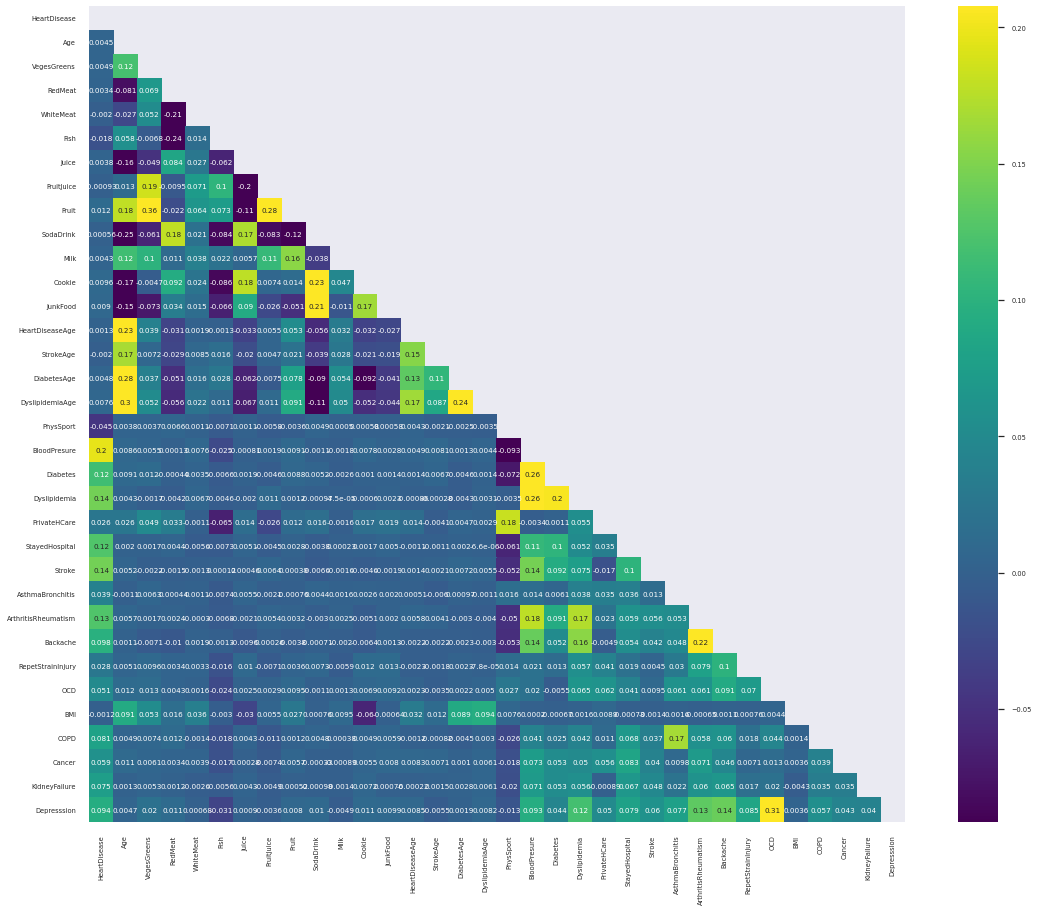

In [ ]:
f = plt.figure(figsize=(19, 15))
mask = np.triu(np.ones_like(df_pns_corr.corr()))
corrplot = sns.heatmap(df_pns_corr.corr(), cmap="viridis", annot=True, mask=mask, robust=True, square=True)
sns.set(font_scale=0.6)
plt.show()